In [1]:
import matplotlib.pyplot as plt
import numpy as np
import langanLib
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib notebook
%matplotlib notebook


def binMatrix(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
            new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)


In [2]:
%matplotlib notebook
n = 100
kappa = .1
mu = .01
beta = 2
lnoise = np.sqrt(12./beta)
grid = np.zeros([n,n], order = 'f')
langanLib.langan.init_random_seed()
langanLib.langan.initializegrid(grid)


<IPython.core.display.Javascript object>


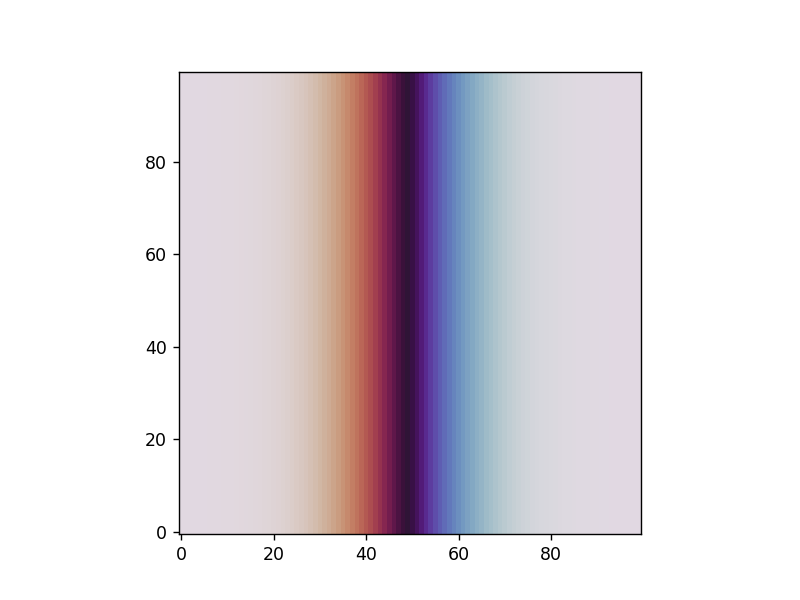

In [3]:
plt.imshow(grid.T, origin = 'top', cmap = 'twilight')

44.721359549995796
1666


<IPython.core.display.Javascript object>


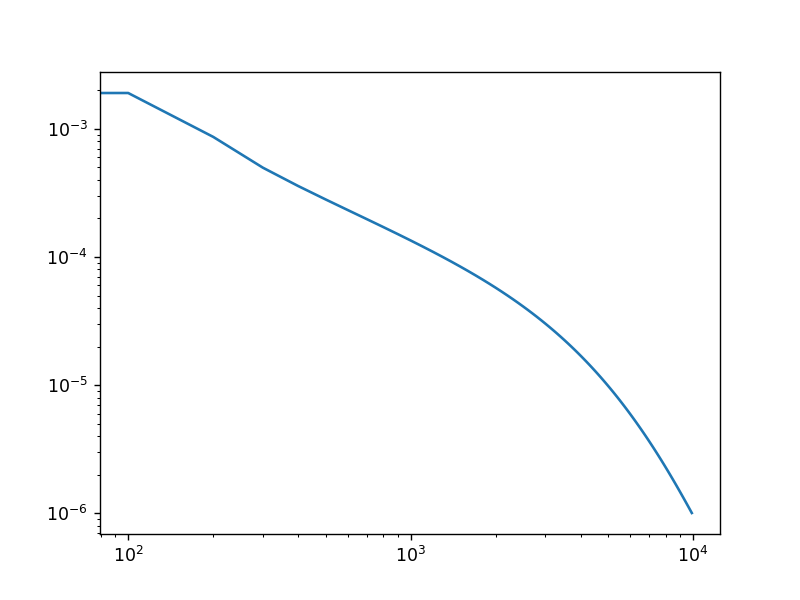

In [47]:
lgrid = []
lham = []
dh = []

n = 100
kappa = 20
mu = 0.01
beta = 5000
lnoise = np.sqrt(12./beta)
langanLib.langan.initializegrid(grid)
ngrid=grid
interations = 10000
plots = 6
div = int(interations/plots)

print(np.sqrt(kappa/mu))
print(div)
for t in np.arange(interations):
    grid = ngrid
    [ngrid,hgrid]=langanLib.langan.update(grid,lnoise,kappa, mu,n)
    if(t%(interations/100)) == 0:
        
        dh.append([t,np.sqrt(np.mean( (ngrid-grid)**2))])
    if (t%div) == 0:
        lgrid.append(ngrid)
        lham.append(hgrid)
dh = np.array(dh).T
fig,ax = plt.subplots()
ax.loglog(dh[0],dh[1])
endgrid=grid

<IPython.core.display.Javascript object>


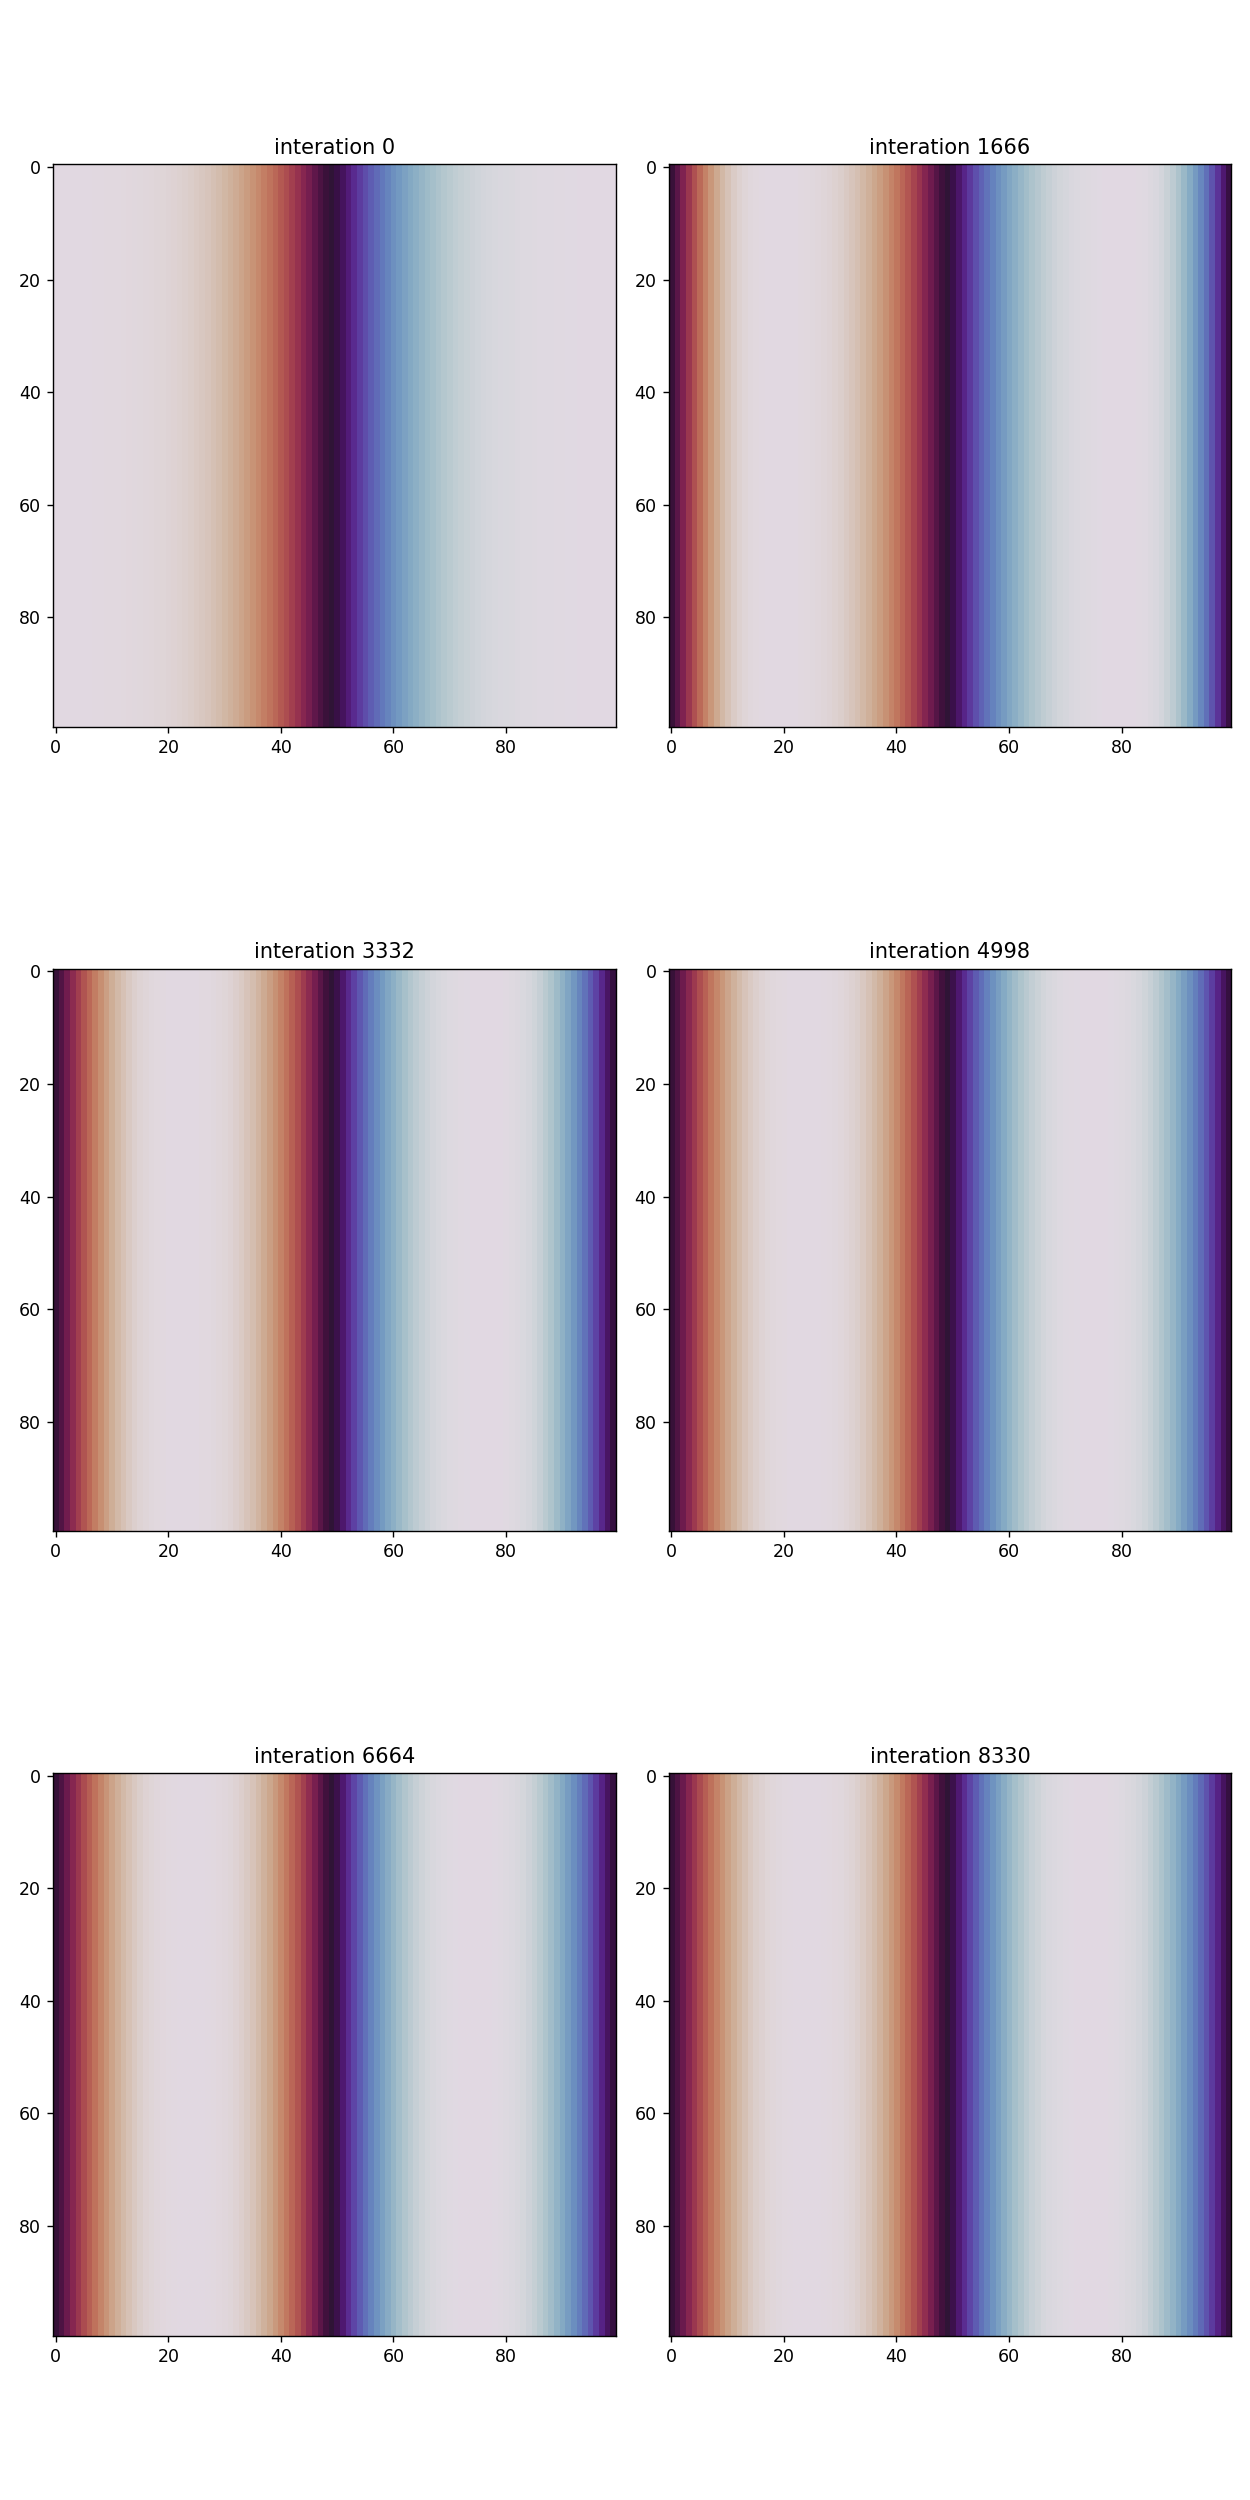

0
1
2
3
4
5


In [45]:
fig,ax = plt.subplots(ncols=2,nrows=3,figsize = (10,20))
for i,a in enumerate(ax.ravel()):
    print(i)
    a.imshow(lgrid[i].T, cmap='twilight')
    a.set_title('interation {}'.format(i*div))
plt.tight_layout()

<IPython.core.display.Javascript object>


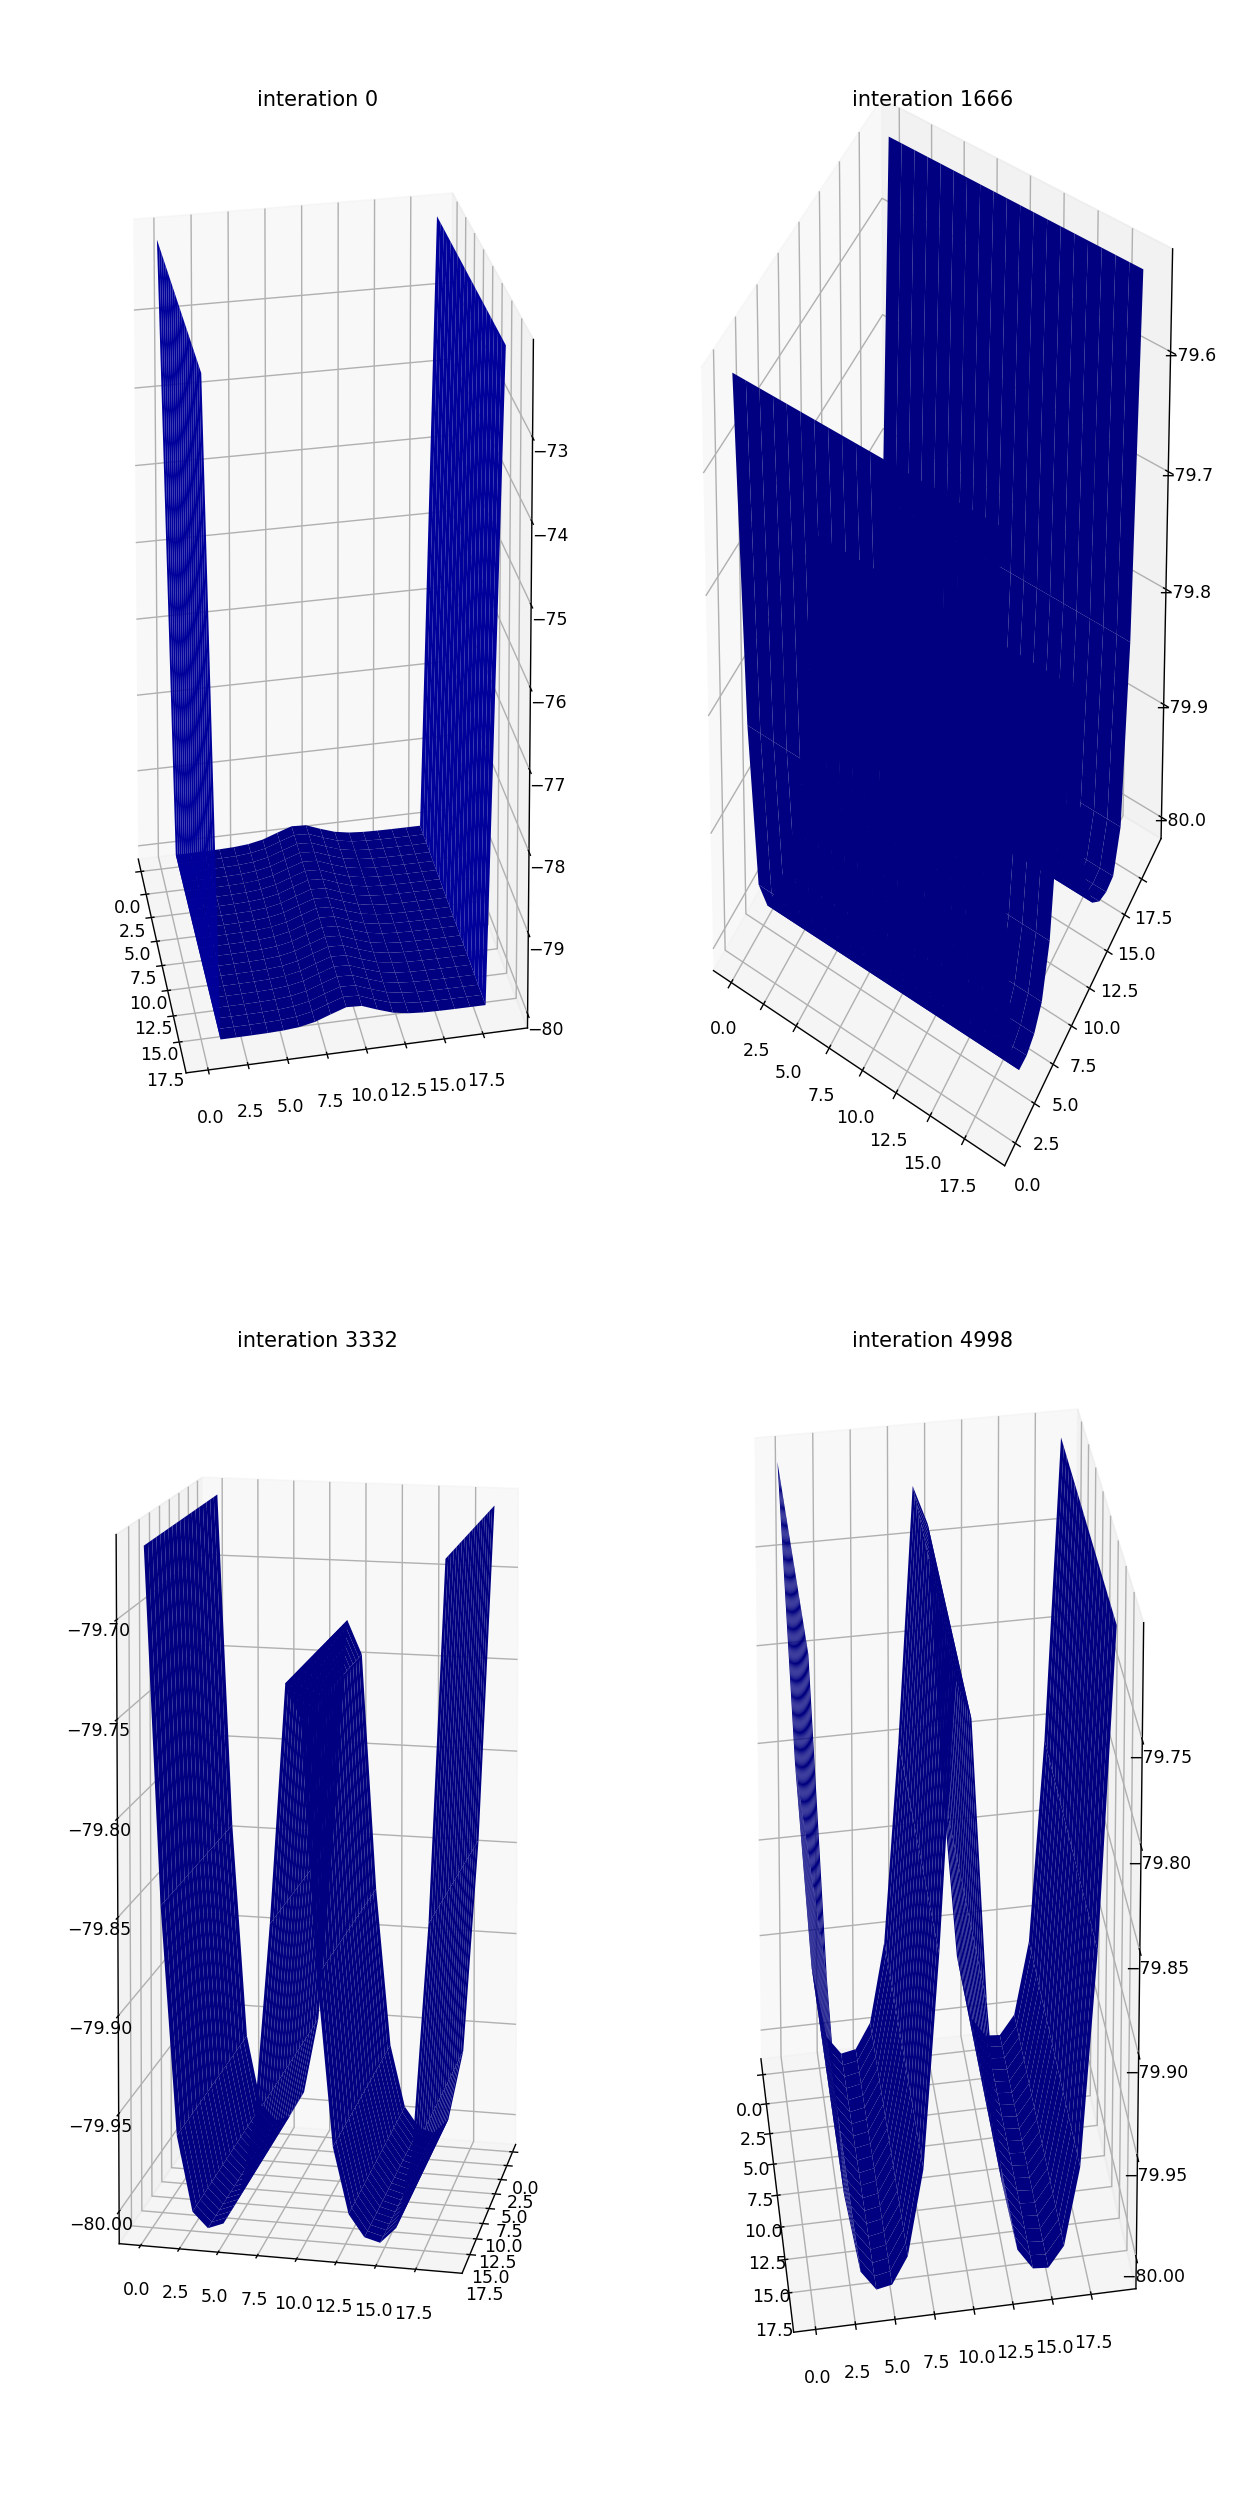

In [46]:
fig,ax = plt.subplots(ncols=2,nrows=2,figsize = (10,20), subplot_kw={'projection': '3d'})
X,Y = np.indices([n,n])
for i,a in enumerate(ax.ravel()):
    #a.imshow(lham[i].T, vmin = -4*kappa-mu, vmax = 4*kappa, cmap = 'jet')
    Z = binMatrix(lham[i],[20,20])
    X,Y = np.indices(Z.shape)
    a.plot_surface(X, Y, Z.T, linewidth=0, cmap='jet', vmin = -4*kappa-mu, vmax = 4*kappa)
    a.set_title('interation {}'.format(i*div))
plt.tight_layout()

# The Soliton doesn't work with periodic boundary conditions.

Now that we have an equilibrium solution, we can feed this back into our model as an initial condition. Then, we will slowly increase the field, from mu=0, to mu=kappa. We will iterate until the hamiltonian differential is converged (try 1000 iterations for the beginning)

In [73]:
grid = endgrid
ngrid = grid
muL = np.linspace(0,.01*kappa,10)
convList = []
finalStates = []
finalEn = []
for mu in muL:
    dh = []
    grid = endgrid
    ngrid = grid
    for t in np.arange(10000):
        grid = ngrid
        [ngrid,hgrid]=langanLib.langan.update(grid,lnoise,kappa, mu,n)
        if(t%(10)) == 0:
            dh.append([t,np.sqrt(np.mean( (ngrid-grid)**2))])
    finalStates.append(grid)
    finalEn.append(hgrid)
    dh = np.array(dh).T
    convList.append(dh)

<IPython.core.display.Javascript object>


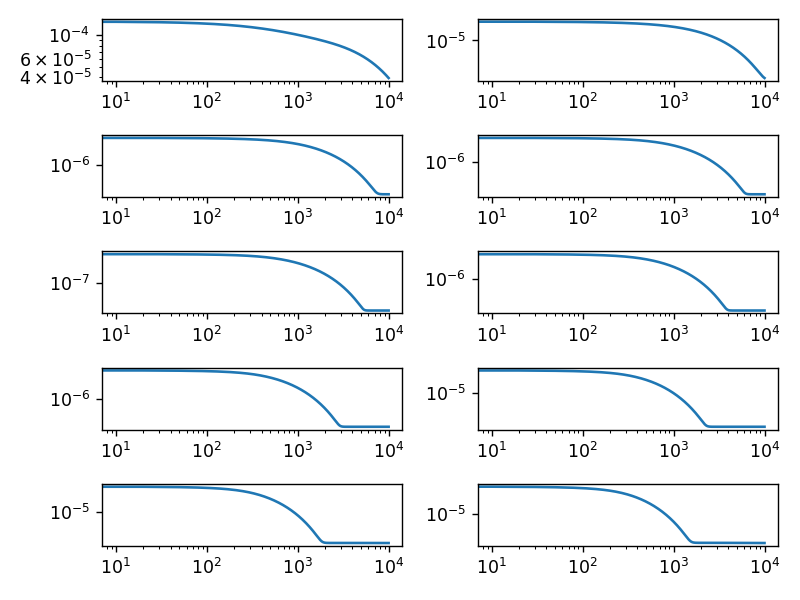

In [74]:
fig,ax = plt.subplots(ncols = 2,nrows = 5)
a = ax.ravel()
for i, mu in enumerate(muL):
    conv = convList[i]
    a[i].loglog(conv[0],conv[1])
plt.tight_layout()

<IPython.core.display.Javascript object>


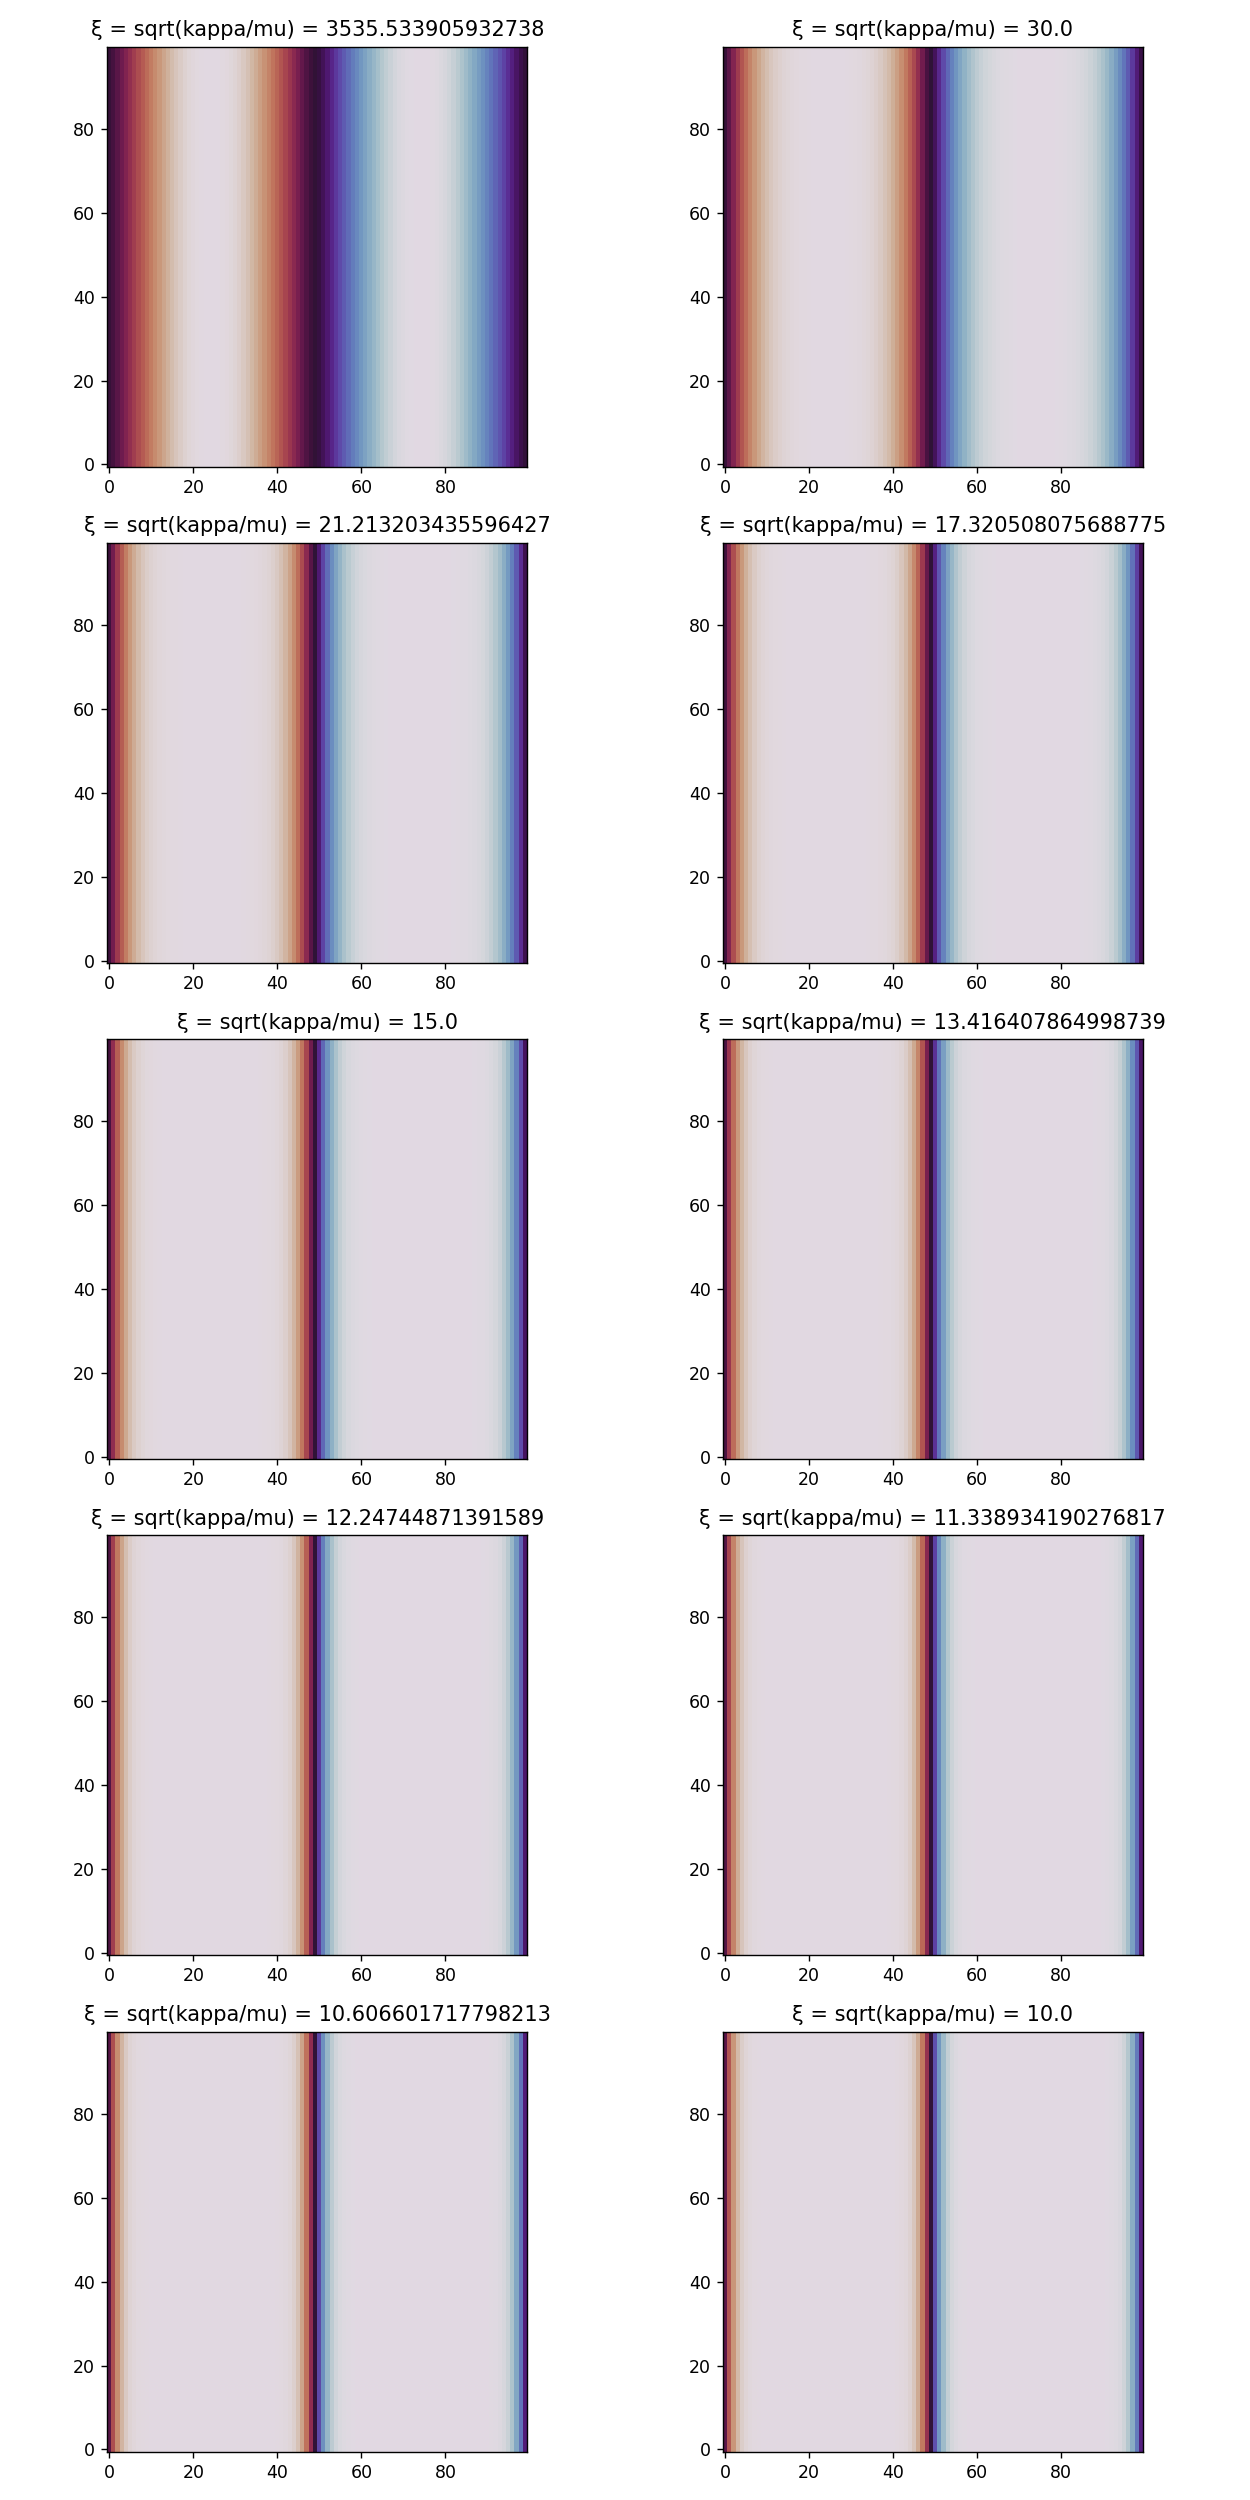

In [97]:
fig,ax = plt.subplots(ncols = 2,nrows = 5,figsize = (10,20))
a = ax.ravel()
muL[0] = muL[0]+.0000001

for i, mu in enumerate(muL):
    xi = np.sqrt(kappa/mu)
    conv = convList[i]
    a[i].imshow(finalStates[i].T, origin = 'top', cmap = 'twilight')
    a[i].set_title('\u03be = sqrt(kappa/mu) = {}'.format(xi))
plt.tight_layout()

<IPython.core.display.Javascript object>


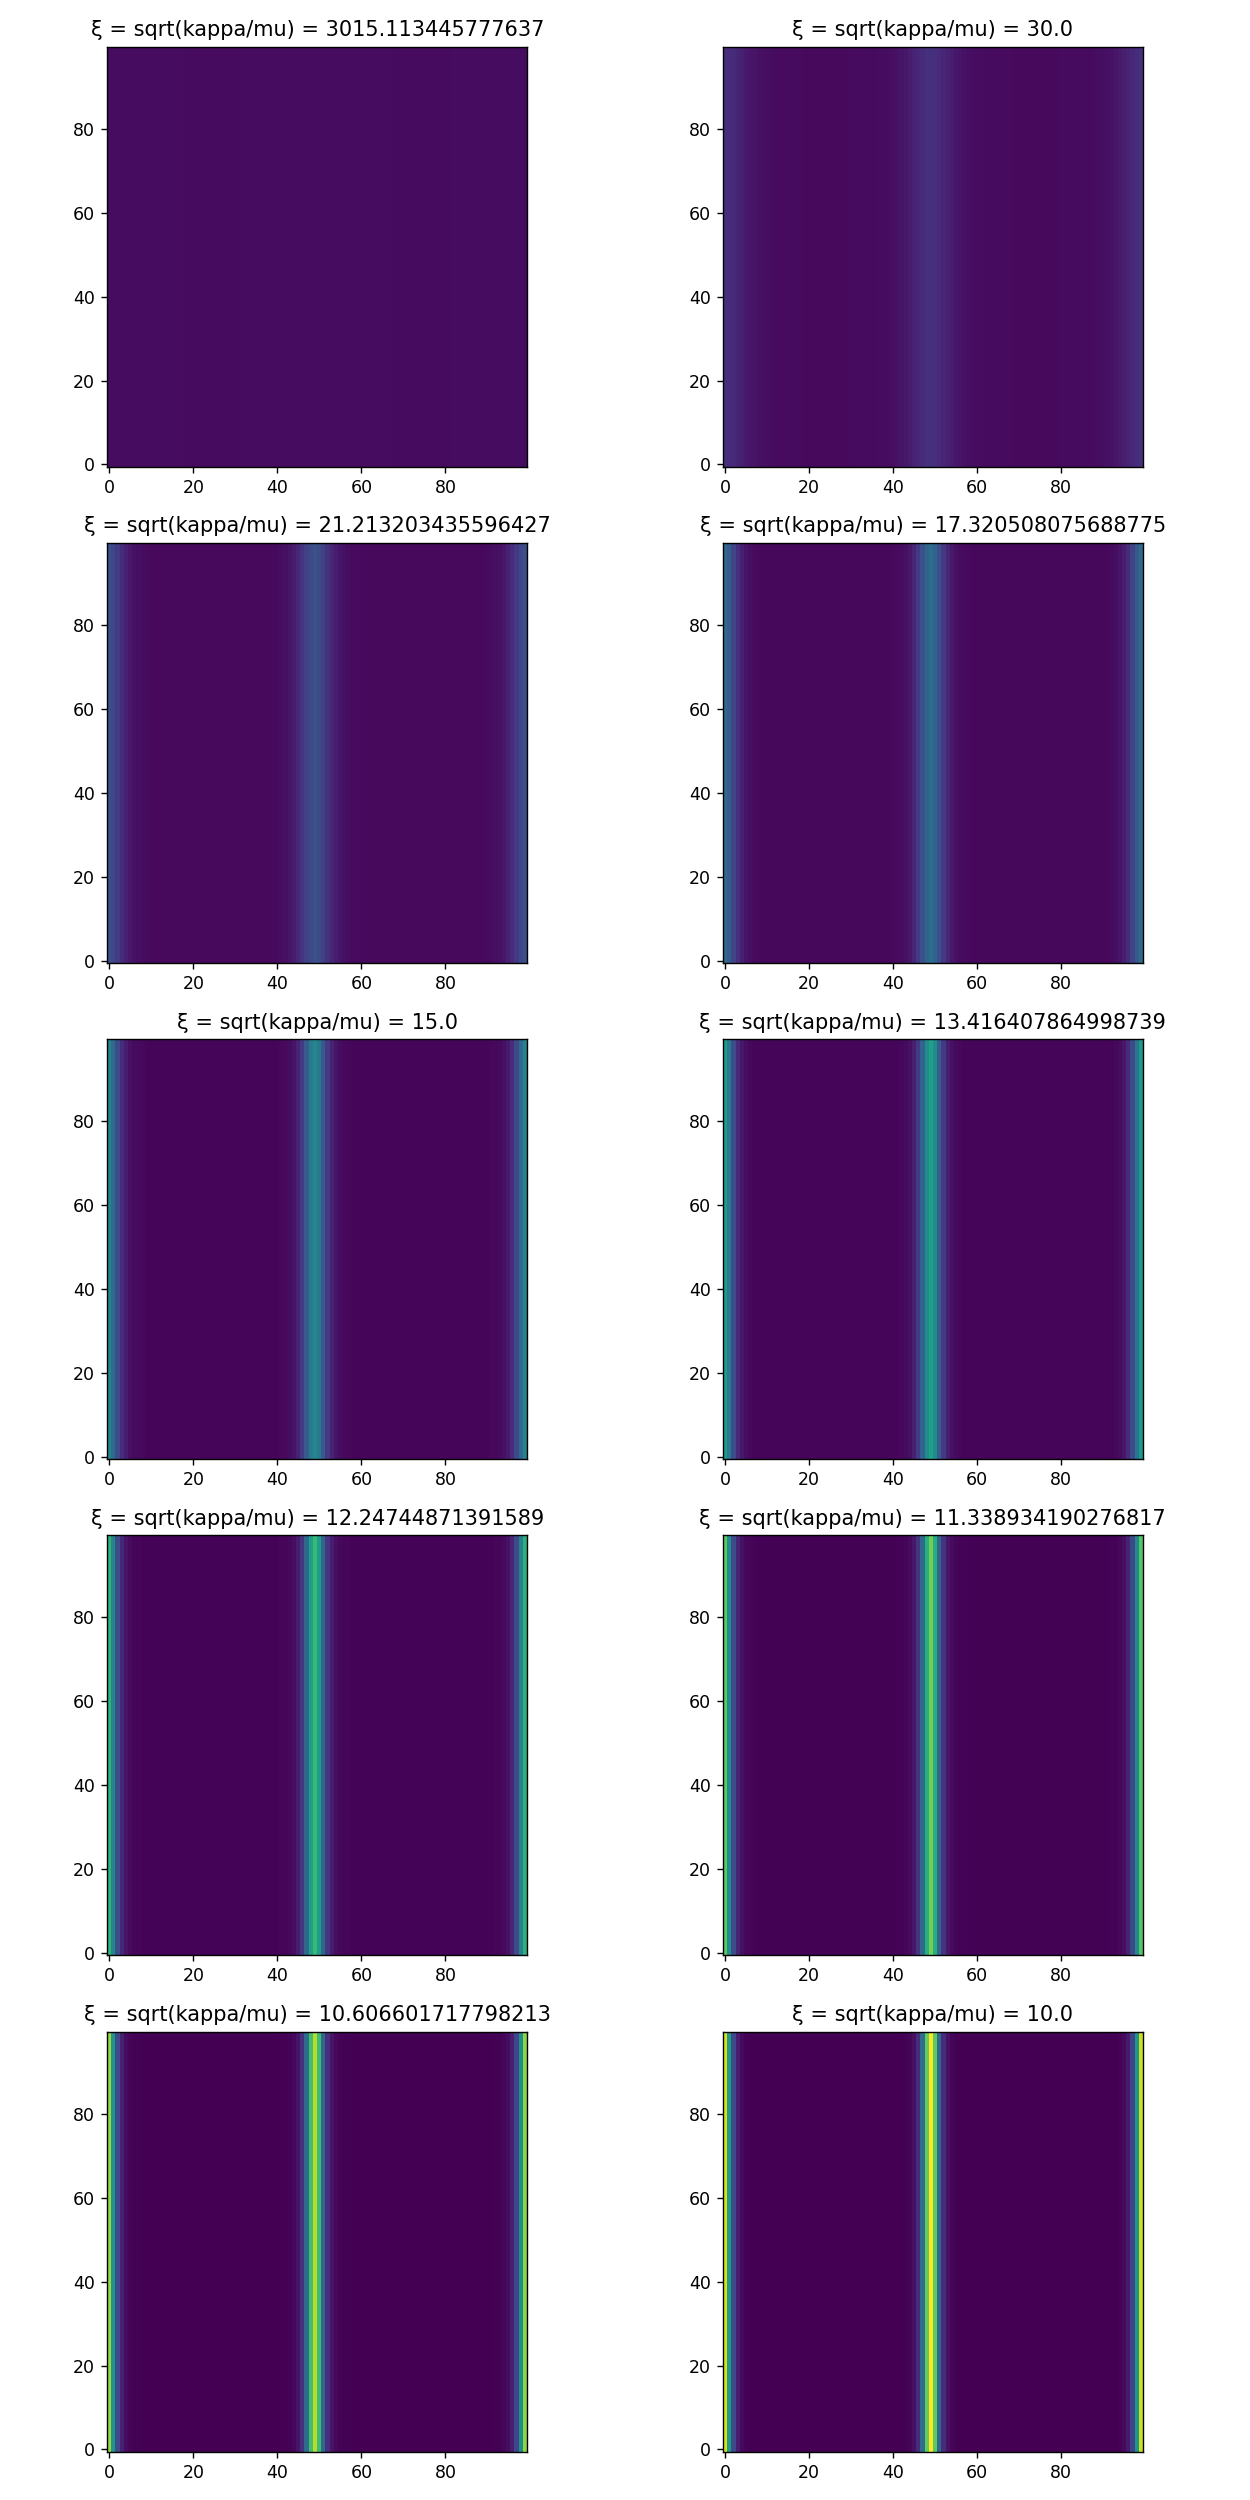

In [103]:
fig,ax = plt.subplots(ncols = 2,nrows = 5,figsize = (10,20))
a = ax.ravel()
muL[0] = muL[0]+.0000001
topEn = -499
botEn = 500
for en in finalEn:
    maxEn = en.max()
    minEn = en.min()
    if topEn < maxEn:
        topEn = maxEn
    if botEn > minEn:
        botEn = minEn

for i, mu in enumerate(muL):
    xi = np.sqrt(kappa/mu)
    conv = convList[i]
    a[i].imshow(finalEn[i].T, origin = 'top', vmin = botEn, vmax = topEn)
    a[i].set_title('\u03be = sqrt(kappa/mu) = {}'.format(xi))
plt.tight_layout()